In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

R0=1.
fv = lambda g: 1+7*np.sin(g)**2*np.cos(g)+2*np.cos(g)-3/2*np.sin(g)*(np.pi-2*g+np.sin(2*g))
R = lambda g: fv(g)**(-1/3)*R0 #radius of the upper and lower sphere
d = lambda g: 2*R(g)*np.cos(g) #distance of upper sphere from equator

gamma=np.flip(np.linspace(np.pi/6,np.pi/2,100))    #some angle values to plot for

In [2]:
def plotGeometry(ax,g):
    """2D plot of nucleus at a given angle measured between upper sphere center and torus center

    Parameters
    ----------
    ax : axes to plot on
    g : angle in rad
    """
    circle1=plt.Circle((0,d(g)),R(g),fc='lightgray',ec=None)             #upper sphere
    circle2=plt.Circle((0,-d(g)),R(g),fc='lightgray',ec=None)            #lower sphere
    circle3=plt.Circle((2*R(g)*np.sin(g),0),R(g),fc='white',ec=None)     #torus cross section to right
    circle4=plt.Circle((-2*R(g)*np.sin(g),0),R(g),fc='white',ec=None)    #torus cross section to left
    polygon=plt.Polygon([
        [-R(g)*np.sin(g),R(g)*np.cos(g)],
        [R(g)*np.sin(g),R(g)*np.cos(g)],
        [R(g)*np.sin(g),-R(g)*np.cos(g)],
        [-R(g)*np.sin(g),-R(g)*np.cos(g)]],fc='lightgray',ec=None)       #area between the upper and lower spheres
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(polygon)
    ax.add_patch(circle3)                                                #note, the two side circles are added after the polygon so they draw over parts
    ax.add_patch(circle4)                                                #of the polygon

    #add arcs to have solid boundaries for the upper and lower sphere, and also for the sides of the inbetween parts
    arc1 = patches.Arc((2*R(g)*np.sin(g), 0.), 2*R(g), 2*R(g), angle=180, theta1=-(90-np.rad2deg(g)), theta2=(90-np.rad2deg(g)), color='black')
    arc2 = patches.Arc((-2*R(g)*np.sin(g), 0.), 2*R(g), 2*R(g), angle=0, theta1=-(90-np.rad2deg(g)), theta2=(90-np.rad2deg(g)), color='black')
    arc3 = patches.Arc(( 0.,d(g)), 2*R(g), 2*R(g), angle=-90, theta1=np.rad2deg(g), theta2=360-np.rad2deg(g), color='black')
    arc4 = patches.Arc(( 0.,-d(g)), 2*R(g), 2*R(g), angle=90, theta1=np.rad2deg(g), theta2=360-np.rad2deg(g), color='black')
    ax.add_patch(arc1)
    ax.add_patch(arc2)
    ax.add_patch(arc3)
    ax.add_patch(arc4)
    #ax.add_artist(polygon)
    ax.set_xlim(-2.3*R0,2.3*R0)
    ax.set_ylim(-2.3*R0,2.3*R0)
    ax.set_aspect('equal')
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks
    ax.set_xticklabels([])  # Remove x tick labels
    ax.set_yticklabels([])  # Remove y tick labels
    ax.spines['top'].set_visible(False)  # Hide top border
    ax.spines['right'].set_visible(False)  # Hide right border
    ax.spines['left'].set_visible(False)  # Hide left border
    ax.spines['bottom'].set_visible(False)  # Hide bottom border
    ax.set_frame_on(False)  # Remove the full frame (optional)


In [3]:
from PIL import Image   #needed to make animation

def makeFrame(i):
    """Function to make one Frame, a side by side plot of the curve and the geometry

    Parameters
    ----------
    i : int
        index of the value used from the global gamma list
    """
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # Plot geometry on the left side
    plotGeometry(ax2,gamma[i])
    
    #Plot a curve on the right side
    ax1.plot(d(gamma)[:i+1],R(gamma)[:i+1],'k--')      #plotting the curve only up to ith element
    ax1.plot(d(gamma)[i],R(gamma)[i],'ko')             #plotting the ith element with a marker

    ax1.set_xlim(0,1.4)
    ax1.set_ylim(0.75,1.05)
    ax1.set_xlabel(r"$d/R_0$")
    ax1.set_ylabel(r"$R/R_0$")
    
    # Show the plot
    plt.tight_layout()
    fig.canvas.draw()
    image = np.array(fig.canvas.renderer.buffer_rgba())  # Convert to array
    plt.close(fig)  # Free memory
    return Image.fromarray(image)  

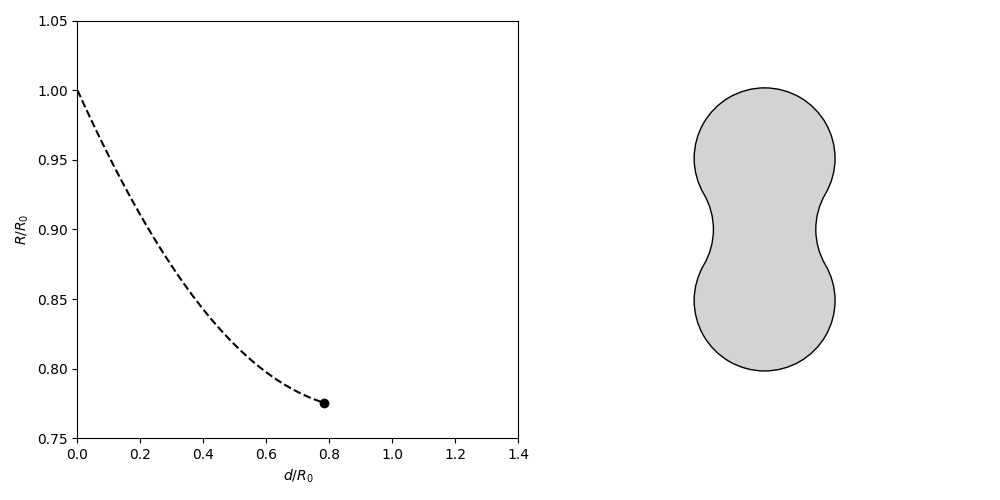

In [4]:
#test makeFrame

makeFrame(50)

In [5]:
frames = [makeFrame(i) for i in range(100)]

# Save as GIF using PIL
frames[0].save("animationdemo.gif", save_all=True, append_images=frames[1:], duration=100, loop=0)